<a href="https://colab.research.google.com/github/aarsh121/Sentiment-Analysis-of-Twitter-Data-for-Assembly-election-2022/blob/main/Sentiwordnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hindi sentiwordnwt

In [ ]:
import pandas as pd
import codecs
from nltk.tokenize import word_tokenize
import re

In [ ]:
d=pd.read_csv('HindiSentiWordnet.txt', delimiter= ' ')

In [ ]:
d.shape

(3014, 5)

In [ ]:
fields = ['POS_TAG', 'ID', 'POS', 'NEG', 'LIST_OF_WORDS']

#Creating a dictionary which contain a tuple for every word. Tuple contains a list of synonyms,
# positive score and negative score for that word.
words_dict = {}
for i in d.index:
    print (d[fields[0]][i], d[fields[1]][i], d[fields[2]][i], d[fields[3]][i], d[fields[4]][i])

    words = d[fields[4]][i].split(',')
    for word in words:
        words_dict[word] = (d[fields[0]][i], d[fields[2]][i], d[fields[3]][i])


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def sentiment(text):
  #data['Sentiment']=" "
  #for i in range(0, 11982):
    words = word_tokenize(text)
    votes = []
    pos_polarity = 0
    neg_polarity = 0
    #adverbs, nouns, adjective, verb are only used
    allowed_words = ['a','v','r','n']
    for word in words:
        if word in words_dict:
            #if word in dictionary, it picks up the positive and negative score of the word
            pos_tag, pos, neg = words_dict[word]
            # print(word, pos_tag, pos, neg)
            if pos_tag in allowed_words:
                if pos > neg:
                    pos_polarity += pos
                    votes.append(1)
                elif neg > pos:
                    neg_polarity += neg
                    votes.append(0)
    #calculating the no. of positive and negative words in total in a review to give class labels
    pos_votes = votes.count(1)
    neg_votes = votes.count(0)
    if pos_votes > neg_votes:
        return 'Positive'
        #data['Sentiment'][i]='Positive'
    elif neg_votes > pos_votes:
        return 'Negative'
        #data['Sentiment'][i]='Negative'
    else:
        if pos_polarity < neg_polarity:
            return 'Negative'
            #data['Sentiment'][i]='Positive'
        else:
            return 'Positive'
            #data['Sentiment'][i]='Negative'

In [ ]:
#print(sentiment("मैं इस उत्पाद से बहुत खुश हूँ  यह आराम दायक और सुन्दर है  यह खरीदने लायक है "))
#print(sentiment("तुम बहुत ही घटिया आदमी हो"))
#data['text'][20]="मैं इस उत्पाद से बहुत खुश हूँ  यह आराम दायक और सुन्दर है  यह खरीदने लायक है "
data['sentiment']=' '
for i in range(0,11982):
  data['sentiment'][i]=sentiment(data['text'][i])

Positive
Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


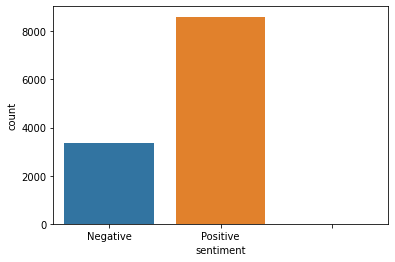

In [ ]:
import seaborn as sns
sns.countplot(data['sentiment'])

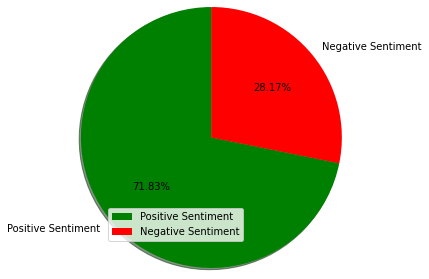

In [ ]:
import matplotlib.pyplot as plt
sentiments = ['Positive Sentiment', 'Negative Sentiment']
slices = [(data["sentiment"] == 'Positive').sum(), (data["sentiment"] == 'Negative').sum()]
colors = ['g', 'r']
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
         radius = 1.5, autopct = '%1.2f%%')
plt.legend()
plt.show()

In [ ]:
data.head(50)

In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly

In [ ]:
#data=pd.read_csv('Book1cv.csv')
#data=pd.read_csv('akhileshfull.csv')
#data=pd.read_csv('up elec full.csv')
#data=pd.read_csv('adihinindifull.csv')
#data=pd.read_csv('akhhinfull.csv')
data=pd.read_csv('akhhinpro_converted.csv')

In [ ]:
data.shape
#del data['id']
#del data['geo']
del data['sentiment']

In [ ]:
data.tail(10)

In [ ]:
data.to_csv('akhhinpro.csv',encoding='utf-8-sig', index=False)

In [ ]:
dataa=pd.read_csv("akhhinpro.csv")

hindi transalation

In [ ]:
#!pip install googletrans
!pip install googletrans
from googletrans import Translator
translator = Translator()

In [ ]:
def conv_eng(df):

  data['Tweet in English'] =" "
  for i in range(0,200):
    count = 0
    try:
      new_text = translator.translate(data["text"][i], des='en').text
      data["Tweet in English"][i] = new_text
    except:
      count = count + 1
  print("No of exceptions : ", count)

1st cleaning method

In [ ]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  text = re.sub("https?:\/\/\S+", ",", text)
  text = re.sub("#","",text)
  return text
data['text'] = data['text'].apply(lambda x: clean_tweets(x))
def rem_stopwords_tokenize(data,name):

    def getting(sen):
        example_sent = sen

        filtered_sentence = []

        stop_words = set(stopwords.words('english'))

        word_tokens = word_tokenize(example_sent)

        filtered_sentence = [w for w in word_tokens if not w in stop_words]

        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

2nd cleaning method

In [ ]:
def preprocess_Reviews_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))
    data[name]=data[name].apply(lambda x:re.sub("RT @[\w]*:","",x))
    data[name]=data[name].apply(lambda x:re.sub("@[\w]*","",x))

# Function to tokenize and remove the stopwords
def rem_stopwords_tokenize(data,name):

    def getting(sen):
        example_sent = sen

        filtered_sentence = []

        stop_words = set(stopwords.words('english'))

        word_tokens = word_tokenize(example_sent)

        filtered_sentence = [w for w in word_tokens if not w in stop_words]

        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

lemmetization

In [ ]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):

        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]

        # Remove characters which have length less than 2
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

joining

In [ ]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# Using the preprocessing function to preprocess the hotel data

# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Tweet in English')
# Converting all the texts back to sentences
make_sentences(data,'Tweet in English')

#Edits After Lemmatization
final_Edit = data['Tweet in English'].copy()
data["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the hotel data
Lemmatization(data,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data,'After_lemmatization')

In [ ]:
data.head(15)


,text,Tweet in English,After_lemmatization
0,अखिलेश यादव मैनपुरी के करहल विधानसभा से चुनाव ...,Akhilesh Yadav contest Karhal assembly constit...,Akhilesh Yadav contest Karhal assembly constit...
1,यूपी_विधानसभा_चुनाव : अखिलेश यादव ने की टीवी च...,UP assembly election : Akhilesh Yadav demanded...,assembly election Akhilesh Yadav demanded ban ...
2,Exclusive: सपा प्रमुख अखिलेश यादव () ने मंहगाई...,Exclusive : SP chief Akhilesh Yadav blames BJP...,Exclusive chief Akhilesh Yadav blame BJP infla...
3,अखिलेश यादव और योगी जी में यही अंतर है,difference akhilesh yadav yogi ji,difference akhilesh yadav yogi
4,अखिलेश यादव का गुमान मिट्टी में मिल गया अखिलेश...,Akhilesh Yadav 's pride found soil Akhilesh Ya...,Akhilesh Yadav pride found soil Akhilesh Yadav...
5,अखिलेश यादव और योगी जी में यही अंतर है,difference akhilesh yadav yogi ji,difference akhilesh yadav yogi
6,उन्नाव की रेप पीड़िता ने अपनी मां आशा सिंह के ...,Unnao rape victim thanked Akhilesh Yadav Mayaw...,Unnao rape victim thanked Akhilesh Yadav Mayaw...
7,Exclusive:अपर्णा यादव के बीजेपी में जाने पर अख...,"Exclusive : On Aparna Yadav joining BJP , Akhi...",Exclusive Aparna Yadav joining BJP Akhilesh sa...
8,श्री अखिलेश यादव जी समाजवादी पार्टी गठबंधन के ...,"Shri Akhilesh Yadav ji , release list candidat...",Shri Akhilesh Yadav release list candidate Sam...
9,"22 लाख रोज़गार,300 यूनिट मुफ़्त बिजली,पुरानी प...","22 lakh jobs , 300 units free electricity , ol...",lakh job unit free electricity old pension sch...


In [ ]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
pos=neg=obj=count=0

postagging = []

for tweet in data['After_lemmatization']:
    list = word_tokenize(tweet)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)

    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet.
    #Synset instances are the groupings of synonymous words that express the same concept.
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0

    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0

data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head)

0        0.250
1       -0.625
2       -1.375
3       -0.375
4        0.500
         ...  
11614   -0.250
11615    0.250
11616    0.250
11617    0.000
11618    0.000
Name: senti_score, Length: 11619, dtype: float64
<bound method NDFrame.head of                                                     text  \
0      अखिलेश यादव मैनपुरी के करहल विधानसभा से चुनाव ...   
1      यूपी_विधानसभा_चुनाव : अखिलेश यादव ने की टीवी च...   
2      Exclusive: सपा प्रमुख अखिलेश यादव () ने मंहगाई...   
3                अखिलेश यादव  और योगी जी में यही अंतर है   
4      अखिलेश यादव का गुमान मिट्टी में मिल गया अखिलेश...   
...                                                  ...   
11614  मा. राष्ट्रीय अध्यक्ष, श्री अखिलेश यादव जी ने ...   
11615  नौजवान वर्दी पहन कर देश की सेवा करना चाहते है।...   
11616  मा0 अखिलेश यादव जी आप उत्तर प्रदेश की रणभूमि म...   
11617  अखिलेश यादव अयोध्या तो जाते हैं, मगर प्रभु श्र...   
11618  श्री श्री 108 श्री केदारनाथ नागा अखाड़ा परिषद ...   

                                   

In [ ]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [ ]:
data.head(10)

,text,Tweet in English,After_lemmatization,pos_tags,senti_score,Overall Sentiment
0,अखिलेश यादव मैनपुरी के करहल विधानसभा से चुनाव ...,Akhilesh Yadav contest Karhal assembly constit...,Akhilesh Yadav contest Karhal assembly constit...,"[(Akhilesh, NNP), (Yadav, NNP), (contest, NN),...",0.250,Positive
1,यूपी_विधानसभा_चुनाव : अखिलेश यादव ने की टीवी च...,UP assembly election : Akhilesh Yadav demanded...,assembly election Akhilesh Yadav demanded ban ...,"[(assembly, RB), (election, NN), (Akhilesh, NN...",-0.625,Negative
2,Exclusive: सपा प्रमुख अखिलेश यादव () ने मंहगाई...,Exclusive : SP chief Akhilesh Yadav blames BJP...,Exclusive chief Akhilesh Yadav blame BJP infla...,"[(Exclusive, JJ), (chief, NN), (Akhilesh, NNP)...",-1.375,Negative
3,अखिलेश यादव और योगी जी में यही अंतर है,difference akhilesh yadav yogi ji,difference akhilesh yadav yogi,"[(difference, NN), (akhilesh, JJ), (yadav, NN)...",-0.375,Negative
4,अखिलेश यादव का गुमान मिट्टी में मिल गया अखिलेश...,Akhilesh Yadav 's pride found soil Akhilesh Ya...,Akhilesh Yadav pride found soil Akhilesh Yadav...,"[(Akhilesh, NNP), (Yadav, NNP), (pride, NN), (...",0.500,Positive
5,अखिलेश यादव और योगी जी में यही अंतर है,difference akhilesh yadav yogi ji,difference akhilesh yadav yogi,"[(difference, NN), (akhilesh, JJ), (yadav, NN)...",-0.375,Negative
6,उन्नाव की रेप पीड़िता ने अपनी मां आशा सिंह के ...,Unnao rape victim thanked Akhilesh Yadav Mayaw...,Unnao rape victim thanked Akhilesh Yadav Mayaw...,"[(Unnao, NNP), (rape, NN), (victim, NN), (than...",0.000,Neutral
7,Exclusive:अपर्णा यादव के बीजेपी में जाने पर अख...,"Exclusive : On Aparna Yadav joining BJP , Akhi...",Exclusive Aparna Yadav joining BJP Akhilesh sa...,"[(Exclusive, JJ), (Aparna, NNP), (Yadav, NNP),...",0.125,Positive
8,श्री अखिलेश यादव जी समाजवादी पार्टी गठबंधन के ...,"Shri Akhilesh Yadav ji , release list candidat...",Shri Akhilesh Yadav release list candidate Sam...,"[(Shri, NNP), (Akhilesh, NNP), (Yadav, NNP), (...",0.125,Positive
9,"22 लाख रोज़गार,300 यूनिट मुफ़्त बिजली,पुरानी प...","22 lakh jobs , 300 units free electricity , ol...",lakh job unit free electricity old pension sch...,"[(lakh, JJ), (job, NN), (unit, NN), (free, JJ)...",0.875,Positive


In [ ]:
#saving file
data.to_csv('Tweets_Pr_akh.csv',encoding='utf-8-sig', index=False)

In [ ]:
dataa=pd.read_csv('Tweets_Pr_akh.csv')

In [ ]:
dataa.shape

(12000, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


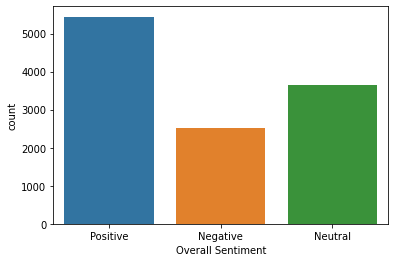

In [ ]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

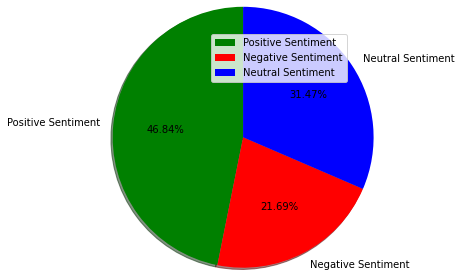

In [ ]:
import matplotlib.pyplot as plt
sentiments = ['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment']
slices = [(data["Overall Sentiment"] == 'Positive').sum(), (data["Overall Sentiment"] == 'Negative').sum(),(data["Overall Sentiment"] == 'Neutral').sum() ]
colors = ['g', 'r', 'b']
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
         radius = 1.5, autopct = '%1.2f%%')
plt.legend()
plt.show()

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
all_words_positive = ' '.join(text for text in data['After_lemmatization'][dataa['Overall Sentiment']=='Positive'])


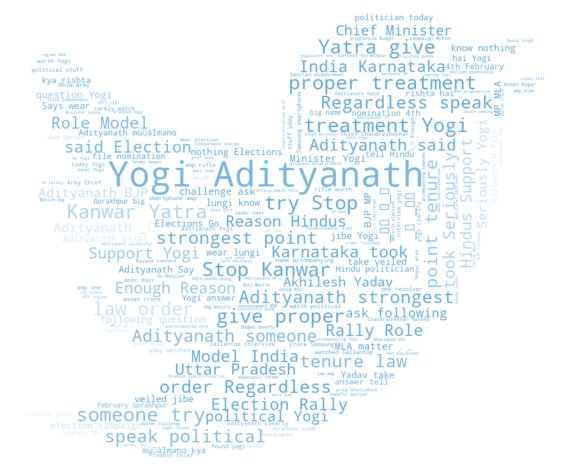

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [ ]:
all_words_negative = ' '.join(text for text in data['After_lemmatization'][data['Overall Sentiment']=='Negative'])


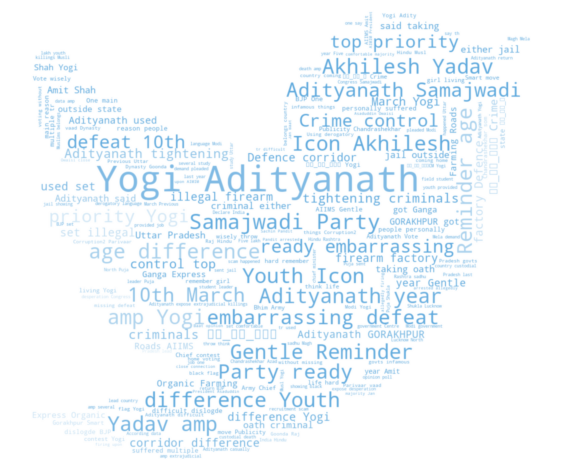

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [ ]:
data['tweet_new'] = data['After_lemmatization'].copy()

In [ ]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['tweet_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,02,023essen,04,054,08,10,10th,12,125th,13,16,17,17य,18,19,1934just,1947,1st,20,2004,2017,202,2022,2022please,2022yogiyogi,2023,2039,21,23,2378212,25,26th,270,280,2hijabisourright,2nd,2years,300,...,yogis,yogitonews18,yogya,you,younger,your,youth,youtube,ysr,ytshorts,yuva,zealand,zee,zeenews,zeeopinionpoll,zero,zihad,एग,कल,खर,ग_य,ज_य,जप,जय,द_ह,फर,बत,यद,र_ज,रखप,रश,षक,हर_घर_भ,இந,இன,𝐁𝐢𝐚𝐬𝐞𝐝,𝐃𝐚𝐧𝐜𝐞,𝐃𝐞𝐦𝐨𝐜𝐫𝐚𝐜𝐲uttarpradeshelections,𝗔𝗮𝗿𝘁𝗶,𝗝𝗲𝗿𝗮𝘁𝗵
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
vect = CountVectorizer()
vect.fit(data['tweet_new'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['tweet_new'])
print(simple_train_dtm)

In [ ]:
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['tweet_new'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
noise_words = []
### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(data['tweet_new'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            data['Overall Sentiment'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Calculate key performance metrics


# Print a classification report
print(classification_report(y_test_tfidf,test_pred_lr_all))

              precision    recall  f1-score   support

    Negative       0.99      0.90      0.95       348
     Neutral       0.94      0.99      0.96       867
    Positive       0.97      0.96      0.96       785

    accuracy                           0.96      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000

